# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: LUIS ALFREDO OSORIO JARAMILLO  <br>

Url: https://github.com/luisalfredoo/03MAIR-Algoritmos-de-Optimizacion-2020/blob/master/SEMINARIO/Plantilla_Seminario_Algoritmos_Entrega2.ipynb  <br>

Problema:

>1. Elección de grupos de población homogéneos <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

(*) La respuesta es obligatoria





                                        

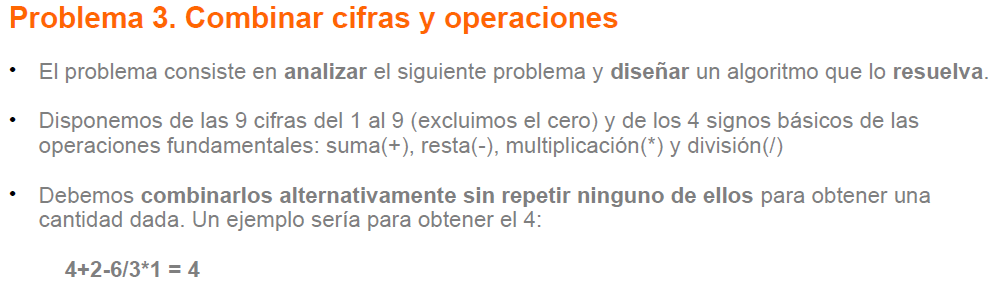

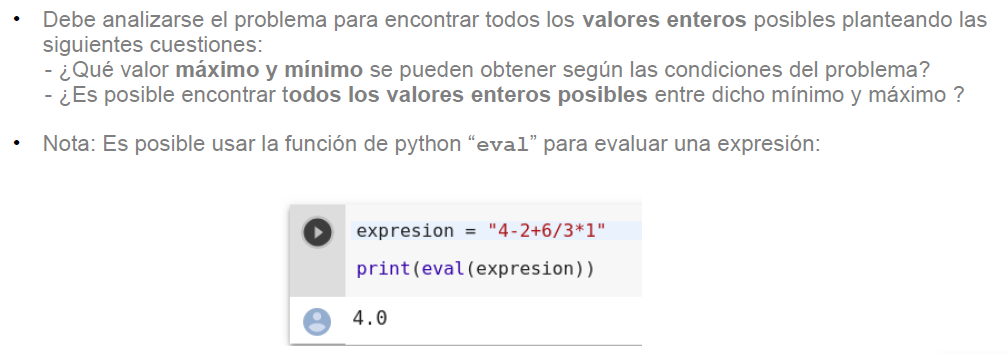

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Sin restricciones :

Tenemos nueve digitos y cuatro signos, para que la cadena total sea consistente y evaluable vamos combinar en una 

cadena de longitud cinco (5) solamente caracteres numericos y tener en cuenta que para cada comibinacion resultante 

debo aplicarle las posibles combinaciones de los signos de operaciones.

Posibles muestras ordenadas de r elementos distintos que se puedes extraer de un conjunto de n elementos ( r <= n )

$V_{n}^r = n * (n-1)*(n-2) ...(n-r+1)$

$V_{9}^5 = 9*8*7*6*5  = 15120 $

Para cada una de estas combinaciones existen $ n!= 4! = 24 $ combinaciones de 4 signos.

### TOTAL tendremos $ 15120 * 24 = 362880 $  posibilidades sin restricciones.


In [4]:
#Validacion con Python del numero de combinaciones :
import itertools

#combinaciones de digitos numericos
T = 0
for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
    T += 1

#combinaciones de signos
T2 = 0
for a in itertools.permutations([1, 2, 3,4],4) :
    T2 += 1
   

print('combinaciones de digitos numericos : \n',T)
print('combinaciones de signos: \n',T2)


combinaciones de digitos numericos : 
 15120
combinaciones de signos: 
 24


Restricciones:

- Valores enteros posibles
- Valor Maximo y minimo
- No se puede iniciar o finalizar la cadena con un signo
- Es posible encontrar todos los numeros enteros entre este minimo y Maximo?

Para el calculo de posibles combinaciones con Restricciones ejecutamos el siguiente script :

- Realizo el ciclo con la evaluacion de todas las combinaciones de 5 digitos y 4 signos
- Para cada expresion evaluo el valor resultante
- Evaluo si es un numero Entero
- Si es un numero Entero entonces guardo la expresion
- Guardo el numero entero resultante en un conjunto SET(), así voy a tener la cantidad de enteros diferentes que se puedan obtener
- Obtengo todas las expresiones que pueden generar un numero especifico.
- El conjunto SET me permite contar sin repeticiones cuantos enteros diferentes fueron generados.


In [14]:
signos=[('-','+','/','*'),('-','+','*','/'),('-','/','*','+'),('-','/','+','*'),('-','*','+','/'),('-','*','/','+'),
        ('+','-','/','*'),('+','-','*','/'),('+','/','*','-'),('+','/','-','*'),('+','*','-','/'),('+','*','/','-'),
        ('/','+','-','*'),('/','+','*','-'),('/','-','*','+'),('/','-','+','*'),('/','*','+','-'),('/','*','-','+'),
        ('*','+','-','/'),('*','+','/','-'),('*','-','/','+'),('*','-','+','/'),('*','/','+','-'),('*','/','-','+') ]

for r in range(24):
    print(signos[r])

('-', '+', '/', '*')
('-', '+', '*', '/')
('-', '/', '*', '+')
('-', '/', '+', '*')
('-', '*', '+', '/')
('-', '*', '/', '+')
('+', '-', '/', '*')
('+', '-', '*', '/')
('+', '/', '*', '-')
('+', '/', '-', '*')
('+', '*', '-', '/')
('+', '*', '/', '-')
('/', '+', '-', '*')
('/', '+', '*', '-')
('/', '-', '*', '+')
('/', '-', '+', '*')
('/', '*', '+', '-')
('/', '*', '-', '+')
('*', '+', '-', '/')
('*', '+', '/', '-')
('*', '-', '/', '+')
('*', '-', '+', '/')
('*', '/', '+', '-')
('*', '/', '-', '+')


In [35]:
#En el siguiente Script recorremos las posibles combinaciones de signos y numeros
#Al final obtendremos el valor maximo y minimo de enteros en el rango de posibilidades
#Tambien obtendremos el conteo de numeros enteros sin repeticion y el numero de combinaciones que generan numeros enteros.

import itertools
import math

def expres(x):
    r = {}  #devuelve todas las expresiones que se generen para un valor especificado
    m = 0   #para devolver el minimo
    M = 0   #para devolver el Maximo
    E = 0   #contador para numero total de combinaciones que dan un entero.
    T = set()  #devuelve el total de enteros sin repeticion
    for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
        # Para cada combinacion de numeros aplico las combinaciones de signos
        for s in range(24):
            b=signos[s]
            expresion=''
            i=0
            for n in a :      #(1, 2, 3, 4, 5) Crear expresion
                if i <=3 :    #indice para los signos b
                    expresion += str(n) + b[i]
                    i +=1
                else :
                    expresion += str(n)
            #Evaluo la expresion para obtener el resultado de la operacion.        
            parte_decimal, parte_entera = math.modf(eval(expresion))
            if parte_decimal == 0 :
                E += 1
                T.add(parte_entera)
                if parte_entera < m : m = eval(expresion)
                if parte_entera > M : M = eval(expresion)
                #Si el valor del resultado obtenido es igual al parametro de entrada entonces almaceno la expresion.   
                if parte_entera == x :
                    r[expresion] = parte_entera
    return r,m,M,T,E

resultado = expres(0)
#print( resultado,'\n')
print('Valor minimo ', resultado[1],'\n')
print('Valor Maximo ', resultado[2],'\n')
print('Numero enteros posibles sin repeticion: ', resultado[3],'\n')
print('Total enteros generados sin repeticion: ', len(resultado[3]),'\n')
print('Total expresiones que generan un numero Entero: ', resultado[4],'\n')

Valor minimo  -69.0 

Valor Maximo  77.0 

Numero enteros posibles sin repeticion:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, -69.0, -68.0, -67.0, -66.0, -65.0, -64.0, -63.0, -62.0, -61.0, -60.0, -59.0, -58.0, -57.0, -56.0, -55.0, -54.0, -53.0, -52.0, -51.0, -50.0, -49.0, -48.0, -47.0, -46.0, -45.0, -44.0, -43.0, -42.0, -41.0, -40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.0, -32.0, -31.0, -30.0, -29.0, -28.0, -27.0, -26.0, -25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -1.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3

### Conclusion :

- Minimo valor entero generado es -69

- MAximo valor entero generado es 77

- Cantidad de numeros enteros sin repeticion es 147

- Total de combinaciones que generan numeros enteros es de  90.000

- Cantidad de numeros enteros diferentes entre el rango del minimo y Maximo seria $77-(-69)+1 = 147$ por tanto en el rango si es posible representar todos los enteros.

- En el siguiente script se devuelve el numero de combinacion que al evaluarlas dan como resultado el numero entero que se ingresa como parametro y que este dentro del rango del valor minimo y maximo encontrados.


In [36]:
#Ingresar numero entero y obtenemos la combinaciones que al ser evaluadas dan ese resultado.

def expres2(x):
    r = {}  #devuelve todas las expresiones que se generen para un valor especificado
    for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
        # Para cada combinacion de numeros aplico las combinaciones de signos
        for s in range(24):
            b=signos[s]
            expresion=''
            i=0
            for n in a :      #(1, 2, 3, 4, 5) Crear expresion
                if i <=3 :    #indice para los signos b
                    expresion += str(n) + b[i]
                    i +=1
                else :
                    expresion += str(n)
            #Evaluo la expresion para obtener el resultado de la operacion.        
            parte_decimal, parte_entera = math.modf(eval(expresion))
            if parte_decimal == 0 :
                #Si el valor del resultado obtenido es igual al parametro de entrada entonces almaceno la expresion.   
                if parte_entera == x :
                    r[expresion] = parte_entera
    return r

# Se ingresa el numero entero que se quiere evaluar :
numero_a_evaluar = -69

resultado2 = expres2(numero_a_evaluar)

print('Total combinaciones para obtener el numero ', numero_a_evaluar ,' : ' ,len(resultado2),'\n') 

print('Combinaciones de digitos y signos: \n')

for x,y in resultado2.items():
    print(x,'=',y)


Total combinaciones para obtener el numero  -69  :  16 

Combinaciones de digitos y signos: 

1+4/2-8*9 = -69.0
1+4/2-9*8 = -69.0
1+6/3-8*9 = -69.0
1+6/3-9*8 = -69.0
1-8*9+4/2 = -69.0
1-8*9+6/3 = -69.0
1-9*8+4/2 = -69.0
1-9*8+6/3 = -69.0
4/2+1-8*9 = -69.0
4/2+1-9*8 = -69.0
4/2-8*9+1 = -69.0
4/2-9*8+1 = -69.0
6/3+1-8*9 = -69.0
6/3+1-9*8 = -69.0
6/3-8*9+1 = -69.0
6/3-9*8+1 = -69.0


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)


Respuesta

El diccionario se adapta bien para almacenar los resultados de las combinaciones, ya que cada combinacion asi incluya 

los mismos elementos **varia su resultado dependiendo del orden de los elementos**. Cada Combinacion la almaceno como una clave

del diccionario y el valor es la evaluacion de de esta combinacion.

Para almacenar el numero de enteros sin repeticion se utilizo el set por su caracteristica de no admitir elementos repetidos.

Para la salida del script se utilizo un Diccionario para almacenar clave y valor, donde la clave es la expresion obtenida de la 

operacion de permutar numeros y signos :

{'1-3+4/6*9': 4.0, '1-3+9/6*4': 4.0, '1-5+4/3*6': 4.0, '1-5+6/3*4': 4.0 ... }

Finalmente el script me devuelve una Tupla con los siguientes elementos :

( {expresion:valor} , valor_minimo , valor_Maximo , {numeros_enteros_no_repetidos} ,  Total_enteros_generados    )

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

La funcion objetivo es la busqueda de combinaciones que me den un numero entero especificado.

#### Evaluo la expresion para obtener el resultado de la operacion.        
$$ partedecimal , parteentera = math.modf(eval(expresion)) $$

Es un problema de busqueda ya que el objetivo es hallar todos los valores enteros posibles con las restricciones.

A continuacion vamos a hallar todas las combinaciones posibles que me generen el Numero $ 4 $


In [37]:
# Se ingresa el numero entero que se quiere evaluar :
numero_a_evaluar = 4

resultado2 = expres2(numero_a_evaluar)

print('Total combinaciones para obtener el numero ', numero_a_evaluar ,' : ' ,len(resultado2),'\n') 

print('Combinaciones de digitos y signos: \n')

for x,y in resultado2.items():
    print(x,'=',y)

Total combinaciones para obtener el numero  4  :  2112 

Combinaciones de digitos y signos: 

1-2*3/6+4 = 4.0
1-2/3*6+7 = 4.0
1/2*4-3+5 = 4.0
1/2*4+5-3 = 4.0
1/2*4-5+7 = 4.0
1*2+4-6/3 = 4.0
1/2*4-6+8 = 4.0
1/2*4+7-5 = 4.0
1/2*4-7+9 = 4.0
1/2*4+8-6 = 4.0
1-2/4*8+7 = 4.0
1/2*4+9-7 = 4.0
1*2+5-9/3 = 4.0
1-2/6*3+4 = 4.0
1/2*6-3+4 = 4.0
1*2-6/3+4 = 4.0
1-2*6/3+7 = 4.0
1/2*6+4-3 = 4.0
1/2*6-4+5 = 4.0
1/2*6+5-4 = 4.0
1/2*6-7+8 = 4.0
1/2*6+8-7 = 4.0
1/2*6-8+9 = 4.0
1/2*6+9-8 = 4.0
1-2*8/4+7 = 4.0
1*2-9/3+5 = 4.0
1-3/2*4+9 = 4.0
1-3*2/6+4 = 4.0
1+3/2*8-9 = 4.0
1-3*4/2+9 = 4.0
1*3+4-6/2 = 4.0
1-3*4/6+5 = 4.0
1-3+4/6*9 = 4.0
1-3/4*8+9 = 4.0
1-3+4*9/6 = 4.0
1*3+5-8/2 = 4.0
1-3/6*2+4 = 4.0
1/3*6-2+4 = 4.0
1*3-6/2+4 = 4.0
1/3*6+4-2 = 4.0
1-3/6*4+5 = 4.0
1/3*6-5+7 = 4.0
1/3*6+7-5 = 4.0
1/3*6-7+9 = 4.0
1-3/6*8+7 = 4.0
1-3*6/9+5 = 4.0
1/3*6+9-7 = 4.0
1*3-8/2+5 = 4.0
1+3*8/2-9 = 4.0
1-3*8/4+9 = 4.0
1-3*8/6+7 = 4.0
1/3*9-4+5 = 4.0
1-3+9*4/6 = 4.0
1/3*9+5-4 = 4.0
1/3*9-5+6 = 4.0
1-3+9/6*4 = 4.0
1-3/9*6+5 

3-9+5*4/2 = 4.0
3-9+5/4*8 = 4.0
3-9+5*8/4 = 4.0
3-9/6*2+4 = 4.0
3/9*6-2+4 = 4.0
3/9*6+4-2 = 4.0
3+9/6*4-5 = 4.0
3-9/6*4+7 = 4.0
3/9*6-5+7 = 4.0
3/9*6+7-5 = 4.0
3-9+8/4*5 = 4.0
3-9+8*5/4 = 4.0
4*1/2-3+5 = 4.0
4-1+2*3/6 = 4.0
4+1-2*3/6 = 4.0
4/1+2*3-6 = 4.0
4/1-2*3+6 = 4.0
4/1*2+3-7 = 4.0
4*1/2+5-3 = 4.0
4*1/2-5+7 = 4.0
4/1*2+5-9 = 4.0
4-1+2/6*3 = 4.0
4-1/2*6+3 = 4.0
4-1*2+6/3 = 4.0
4+1-2/6*3 = 4.0
4+1/2*6-3 = 4.0
4+1*2-6/3 = 4.0
4*1+2-6/3 = 4.0
4*1-2+6/3 = 4.0
4*1/2-6+8 = 4.0
4/1*2-7+3 = 4.0
4*1/2+7-5 = 4.0
4*1/2-7+9 = 4.0
4*1/2+8-6 = 4.0
4/1*2-9+5 = 4.0
4*1/2+9-7 = 4.0
4-1+3*2/6 = 4.0
4+1-3*2/6 = 4.0
4/1+3*2-6 = 4.0
4/1-3*2+6 = 4.0
4-1+3/6*2 = 4.0
4-1/3*6+2 = 4.0
4-1*3+6/2 = 4.0
4+1-3/6*2 = 4.0
4+1/3*6-2 = 4.0
4+1*3-6/2 = 4.0
4*1+3-6/2 = 4.0
4*1-3+6/2 = 4.0
4-1*6/2+3 = 4.0
4+1*6/2-3 = 4.0
4/1+6-2*3 = 4.0
4/1-6+2*3 = 4.0
4*1+6/2-3 = 4.0
4*1-6/2+3 = 4.0
4-1*6/3+2 = 4.0
4+1*6/3-2 = 4.0
4/1+6-3*2 = 4.0
4/1-6+3*2 = 4.0
4*1+6/3-2 = 4.0
4*1-6/3+2 = 4.0
4/2-1*3+5 = 4.0
4/2*1-3+5 = 4.0
4-2+1/3*

6/2*1+5-4 = 4.0
6-2/1*5+8 = 4.0
6/2-1*7+8 = 4.0
6/2*1-7+8 = 4.0
6/2+1*8-7 = 4.0
6/2*1+8-7 = 4.0
6/2-1*8+9 = 4.0
6/2*1-8+9 = 4.0
6/2+1*9-8 = 4.0
6/2*1+9-8 = 4.0
6-2*3/1+4 = 4.0
6/2-3*1+4 = 4.0
6/2-3+1*4 = 4.0
6+2*3/1-8 = 4.0
6-2*3+4/1 = 4.0
6/2-3+4*1 = 4.0
6/2*3+4-9 = 4.0
6+2*3-8/1 = 4.0
6-2/3*9+4 = 4.0
6/2*3-9+4 = 4.0
6+2/3*9-8 = 4.0
6/2+4-1*3 = 4.0
6/2+4*1-3 = 4.0
6/2-4*1+5 = 4.0
6/2-4+1*5 = 4.0
6/2*4+1-9 = 4.0
6/2+4-3*1 = 4.0
6/2-4+5*1 = 4.0
6*2/4-7+8 = 4.0
6+2*4/8-3 = 4.0
6*2/4+8-7 = 4.0
6*2/4-8+9 = 4.0
6/2*4-9+1 = 4.0
6*2/4+9-8 = 4.0
6/2+5-1*4 = 4.0
6/2+5*1-4 = 4.0
6-2*5/1+8 = 4.0
6/2+5-4*1 = 4.0
6-2*5+8/1 = 4.0
6/2-7*1+8 = 4.0
6/2-7+1*8 = 4.0
6/2-7+8*1 = 4.0
6/2+8-1*7 = 4.0
6/2+8*1-7 = 4.0
6/2-8*1+9 = 4.0
6/2-8+1*9 = 4.0
6+2/8*4-3 = 4.0
6/2+8-7*1 = 4.0
6/2-8+9*1 = 4.0
6/2+9-1*8 = 4.0
6/2+9*1-8 = 4.0
6-2*9/3+4 = 4.0
6+2*9/3-8 = 4.0
6/2+9-8*1 = 4.0
6-3/1*2+4 = 4.0
6/3-1*2+4 = 4.0
6/3*1-2+4 = 4.0
6+3/1*2-8 = 4.0
6/3+1*4-2 = 4.0
6/3*1+4-2 = 4.0
6/3-1*5+7 = 4.0
6/3*1-5+7 = 4.0
6/3+1*7-

9+3*4/6-7 = 4.0
9-3*4+7/1 = 4.0
9-3/4*8+1 = 4.0
9/3+5-1*4 = 4.0
9/3+5*1-4 = 4.0
9/3-5*1+6 = 4.0
9/3-5+1*6 = 4.0
9/3+5-4*1 = 4.0
9/3-5+6*1 = 4.0
9/3+6-1*5 = 4.0
9/3+6*1-5 = 4.0
9/3-6*1+7 = 4.0
9/3-6+1*7 = 4.0
9-3*6/2+4 = 4.0
9+3/6*4-7 = 4.0
9/3+6-5*1 = 4.0
9/3-6+7*1 = 4.0
9/3+7-1*6 = 4.0
9/3+7*1-6 = 4.0
9/3-7*1+8 = 4.0
9/3-7+1*8 = 4.0
9/3-7+2*4 = 4.0
9/3-7+4*2 = 4.0
9/3+7-6*1 = 4.0
9/3-7+8*1 = 4.0
9/3+8-1*7 = 4.0
9/3+8*1-7 = 4.0
9-3*8/2+7 = 4.0
9-3*8/4+1 = 4.0
9/3+8-7*1 = 4.0
9-4/1*2+3 = 4.0
9+4*1/2-7 = 4.0
9-4/1*3+7 = 4.0
9-4*2/1+3 = 4.0
9+4/2*1-7 = 4.0
9+4/2-1*7 = 4.0
9-4/2*3+1 = 4.0
9-4*2+3/1 = 4.0
9-4/2*6+7 = 4.0
9+4/2-7*1 = 4.0
9+4*2/8-6 = 4.0
9-4*3/1+7 = 4.0
9-4*3/2+1 = 4.0
9+4-3/2*6 = 4.0
9+4-3*6/2 = 4.0
9+4*3/6-7 = 4.0
9-4*3+7/1 = 4.0
9*4/6+1-3 = 4.0
9+4-6/2*3 = 4.0
9-4*6/2+7 = 4.0
9*4/6-3+1 = 4.0
9+4-6*3/2 = 4.0
9*4/6+3-5 = 4.0
9+4/6*3-7 = 4.0
9*4/6-5+3 = 4.0
9*4/6+5-7 = 4.0
9*4/6-7+5 = 4.0
9+4/8*2-6 = 4.0
9-6/1*2+7 = 4.0
9+6*1/2-8 = 4.0
9+6*1/3-7 = 4.0
9-6*2/1+7 = 4.0
9+6/2*1-

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Es un algoritmo por fuerza bruta debido a que se evaluan todas las posibilidades.

In [41]:
# Se presenta a continuacion el codigo completo del script que genera las combinaciones entre 5 digitos de 9 
#  y 4 signos de operacion para que al ser evaluados me den el valor del parametro ingresaso.
import itertools
import math

def expres(x):
    r = {}  #devuelve todas las expresiones que se generen para un valor especificado
    m = 0   #para devolver el minimo
    M = 0   #para devolver el Maximo
    E = 0   #contador para numero total de combinaciones que dan un entero.
    T = set()  #devuelve el total de enteros sin repeticion
    for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
        # Para cada combinacion de numeros aplico las combinaciones de signos
        for s in range(24):
            b=signos[s]
            expresion=''
            i=0
            for n in a :      #(1, 2, 3, 4, 5) Crear expresion
                if i <=3 :    #indice para los signos b
                    expresion += str(n) + b[i]
                    i +=1
                else :
                    expresion += str(n)
            #Evaluo la expresion para obtener el resultado de la operacion.        
            parte_decimal, parte_entera = math.modf(eval(expresion))
            if parte_decimal == 0 :
                E += 1
                T.add(parte_entera)
                if parte_entera < m : m = eval(expresion)
                if parte_entera > M : M = eval(expresion)
                #Si el valor del resultado obtenido es igual al parametro de entrada entonces almaceno la expresion.   
                if parte_entera == x :
                    r[expresion] = parte_entera
    return r,m,M,T,E


resultado = expres(44)  # prametro de evaluacion ingresado 44

print( resultado,'\n')
print('Valor minimo: ', resultado[1],'\n')
print('Valor Maximo: ', resultado[2],'\n')
print('Numero enteros no repetidos en el rango min-Max: ', resultado[3],'\n')
print('Total enteros sin repeticion : ', len(resultado[3]),'\n')
print('Total enteros generados en el rango min-Max : ', resultado[4],'\n')
print('Para un total de ', len(resultado[0]), ' expresiones con el numero solicitado')

({'1-4/2+5*9': 44.0, '1-4/2+9*5': 44.0, '1+5*9-4/2': 44.0, '1+5*9-6/3': 44.0, '1+5*9-8/4': 44.0, '1-6/3+5*9': 44.0, '1-6/3+9*5': 44.0, '1-8/4+5*9': 44.0, '1-8/4+9*5': 44.0, '1+9*5-4/2': 44.0, '1+9*5-6/3': 44.0, '1+9*5-8/4': 44.0, '2/1-3+5*9': 44.0, '2/1-3+9*5': 44.0, '2/1+5*9-3': 44.0, '2/1+9*5-3': 44.0, '2-3/1+5*9': 44.0, '2-3/1+9*5': 44.0, '2-3+5/1*9': 44.0, '2-3+5*9/1': 44.0, '2-3+9/1*5': 44.0, '2-3+9*5/1': 44.0, '2+5/1*9-3': 44.0, '2+5*9/1-3': 44.0, '2+5*9-3/1': 44.0, '2+9/1*5-3': 44.0, '2+9*5/1-3': 44.0, '2+9*5-3/1': 44.0, '3/1-4+5*9': 44.0, '3/1-4+9*5': 44.0, '3/1+5*9-4': 44.0, '3/1+6*8-7': 44.0, '3/1-7+6*8': 44.0, '3/1-7+8*6': 44.0, '3/1+8*6-7': 44.0, '3/1+9*5-4': 44.0, '3-4/1+5*9': 44.0, '3-4/1+9*5': 44.0, '3-4+5/1*9': 44.0, '3-4+5*9/1': 44.0, '3-4+9/1*5': 44.0, '3-4+9*5/1': 44.0, '3+5/1*9-4': 44.0, '3+5*9/1-4': 44.0, '3+5*9-4/1': 44.0, '3+5*9-8/2': 44.0, '3+6/1*8-7': 44.0, '3+6*8/1-7': 44.0, '3+6*8-7/1': 44.0, '3-7/1+6*8': 44.0, '3-7/1+8*6': 44.0, '3-7+6/1*8': 44.0, '3-7+6*8/1

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

Complejidad 

$V_{n}^r = n * (n-1)*(n-2) ...(n-r+1)$


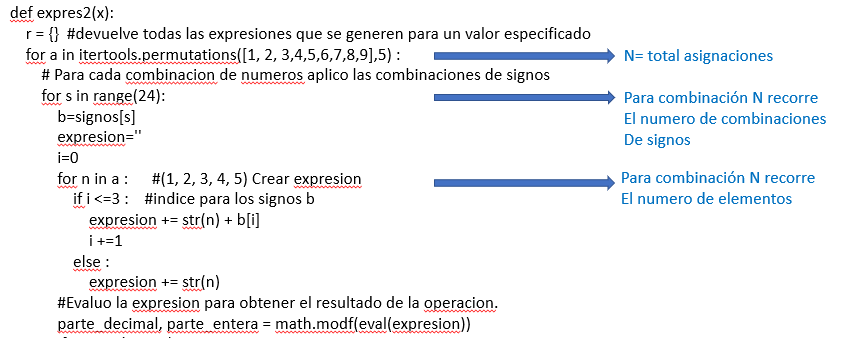


Tres bucles, uno para recorrer el vector de combinaciones de numeros, otros para recorres el vector de combinaciones de 

signos y finalmente otro para recorrer cada set y combinar los signos con los numeros

Siendo N el numero de combinaciones de numeros del 0 al 9, 

M es el numero de combinaciones de signos y 

L es el numero de elementos de la cadena final que se va a evaluar

entonces la complejidad seria $O(N*M*L)$   

#### Por tanto se representa su complejidad como $ O(n^3) $


Para estimar esta complejidad se elevó consulta al profesor debido a la duda respecto a este calculo:


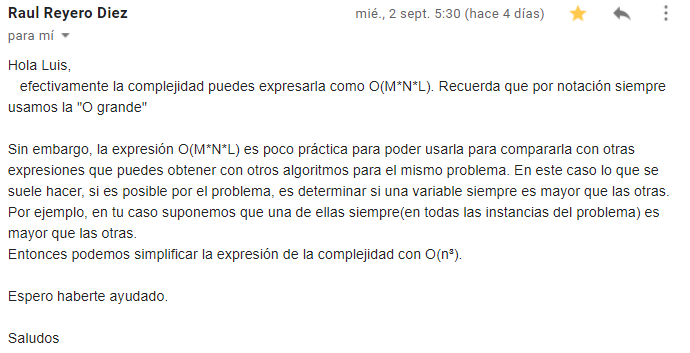


(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [ ]:
# tomando como referencia https://docs.python.org/3.1/library/itertools.html?highlight=combinations

def product(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)


def permutations(iterable, r=None):
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    for indices in product(range(n), repeat=r):
        if len(set(indices)) == r:
            yield tuple(pool[i] for i in indices)
            
for a in permutations('123456789', 5):
    print(a)

(*)Calcula la complejidad del algoritmo 

Respuesta

La complejidad se reduce por que solo requiere dos bucles para realizar las permutaciones entre numeros y signos.

Por tanto se representa su complejidad como  $ O(n^2) $


Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Modificacion del script para que dado un numero aleatorio entre 0 y 77 me devuelva la expresion con numeros del 0 al 9 y los signos basicos.


In [42]:
import itertools
import math
import numpy as np

def expres(x):
    r = {}  #devuelve todas las expresiones que se generen para un valor especificado
    for a in itertools.permutations([1, 2, 3,4,5,6,7,8,9],5) :
        # Para cada combinacion de numeros aplico las combinaciones de signos
        for s in range(24):
            b=signos[s]
            expresion=''
            i=0
            for n in a :      #(1, 2, 3, 4, 5) Crear expresion
                if i <=3 :    #indice para los signos b
                    expresion += str(n) + b[i]
                    i +=1
                else :
                    expresion += str(n)
            #Evaluo la expresion para obtener el resultado de la operacion.        
            parte_decimal, parte_entera = math.modf(eval(expresion))
            if parte_decimal == 0 :
                #Si el valor del resultado obtenido es igual al parametro de entrada entonces almaceno la expresion.   
                if parte_entera == x :
                    r[expresion] = parte_entera
    return r


Aplica el algoritmo al juego de datos generado

Respuesta

In [43]:
resultado = expres(np.random.randint(-69,78))

print( resultado,'\n')

{'1+2/3*6-5': 0.0, '1-2/3*9+5': 0.0, '1+2/3*9-7': 0.0, '1/2*4+3-5': 0.0, '1/2*4-5+3': 0.0, '1/2*4+5-7': 0.0, '1*2-4+6/3': 0.0, '1+2-4*6/8': 0.0, '1/2*4+6-8': 0.0, '1/2*4-7+5': 0.0, '1/2*4+7-9': 0.0, '1-2/4*8+3': 0.0, '1+2/4*8-5': 0.0, '1+2-4/8*6': 0.0, '1/2*4-8+6': 0.0, '1/2*4-9+7': 0.0, '1*2-5+9/3': 0.0, '1*2+6/3-4': 0.0, '1+2*6/3-5': 0.0, '1/2*6+4-7': 0.0, '1+2-6*4/8': 0.0, '1/2*6+5-8': 0.0, '1/2*6-7+4': 0.0, '1+2-6/8*4': 0.0, '1/2*6-8+5': 0.0, '1+2/6*9-4': 0.0, '1/2*8+3-7': 0.0, '1-2*8/4+3': 0.0, '1+2*8/4-5': 0.0, '1/2*8+5-9': 0.0, '1/2*8-7+3': 0.0, '1/2*8-9+5': 0.0, '1-2*9/3+5': 0.0, '1*2+9/3-5': 0.0, '1+2*9/3-7': 0.0, '1+2*9/6-4': 0.0, '1-3/2*4+5': 0.0, '1+3/2*4-7': 0.0, '1+3-2/4*8': 0.0, '1-3/2*6+8': 0.0, '1+3-2*8/4': 0.0, '1-3*4/2+5': 0.0, '1*3+4/2-5': 0.0, '1+3*4/2-7': 0.0, '1-3/4*8+5': 0.0, '1+3/4*8-7': 0.0, '1*3-5+4/2': 0.0, '1*3-5+8/4': 0.0, '1/3*6+2-4': 0.0, '1-3*6/2+8': 0.0, '1/3*6-4+2': 0.0, '1/3*6+5-7': 0.0, '1/3*6-7+5': 0.0, '1/3*6+7-9': 0.0, '1+3/6*8-5': 0.0, '1/3*6-9+

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

 - utilizacion de python itertools
 
https://docs.python.org/3.1/library/itertools.html?highlight=combinations

 - generacion de permutaciones
 
https://stackoverflow.com/questions/104420/how-to-generate-all-permutations-of-a-list

 - manejo de objetos de python como set, lista y Diccionarios

https://www.w3schools.com/python/python_lists.asp



Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

El problema puede aumentar en el conjunto de numeros a partir del cual se extrae la combinacion. Se podria permitir que se 

repitieran signos para generar cadenas de evaluacion mas largas. La formula que nos da el numero de combinaciones de un sub-

conjunto de numeros sigue siendo :

$V_{n}^r = n * (n-1)*(n-2) ...(n-r+1)$

Pero el algoritmo no neceariamente modifica su complejidad, ya que logrando todas las combinaciones del subconjunto de numeros

se obtendrian las posibles expresiones a evaluar.